## **1.1 Clone repository**

## **1.2 Create environment**

## **1.3 Install Requirements**

## **1.4 Import Data**

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv (r'../data/raw/train_data.csv', header=None)
df_labels = pd.read_csv (r'../data/raw/train_labels.csv', names = ['target'], header=None)

In [15]:
df.shape

(3750, 10000)

In [16]:
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
1823,-189.147,-162.980,-90895.547,32801.871,-5339.617,-1186.218,280.705,908.868,183.329,-340.425,...,92.367,409.111,74.540,397.113,-3.808,-175.939,-473.065,1605.658,-155.012,395.069
2109,86.160,-228.679,-81673.165,-63166.966,29859.083,2043.786,-1498.754,348.806,329.848,377.372,...,96.585,-349.685,118.613,787.780,-509.372,-303.378,359.850,981.380,637.490,354.578
945,239.331,97.479,51819.060,28517.158,-14924.377,1415.415,376.225,551.845,-521.691,-82.413,...,-111.492,-58.103,9.310,377.991,-565.453,-87.287,-419.665,-79.830,65.079,-648.630
671,-255.750,105.999,103660.606,40666.511,881.067,629.098,-711.246,1510.789,-555.629,108.866,...,-63.798,19.522,412.859,27.578,453.178,216.117,149.672,364.872,-1003.189,19.140
1370,296.250,106.858,35479.841,-39973.811,27433.231,-27.770,989.186,1020.799,109.927,185.530,...,-238.344,-459.743,-7.360,-814.402,-267.123,-154.480,-160.638,-77.035,-1510.648,2212.023
1337,172.949,114.058,-33023.301,17419.199,-38085.243,-365.826,851.542,-22.920,-729.403,-153.402,...,-318.717,1065.173,114.428,235.936,-311.629,-203.129,-89.710,56.832,67.337,599.327
477,-561.814,-306.232,-4892.257,32225.887,-21845.015,147.966,-1588.111,720.218,1002.405,120.653,...,-170.055,80.324,229.962,-399.668,1416.107,777.614,-62.774,742.471,432.987,-710.523
3524,167.390,-559.674,-19612.228,105013.908,21149.782,388.244,268.231,527.675,-444.720,115.117,...,399.340,-73.548,396.589,1036.084,-275.311,195.232,-181.320,404.645,-17.667,-23.159
1731,-280.299,113.316,62305.282,-120885.268,16926.372,-338.649,-457.141,-242.798,149.925,-18.242,...,340.974,831.958,307.375,103.822,785.842,-684.304,-153.686,-673.142,962.888,-536.954
957,-101.861,200.237,81885.419,-18156.779,66170.137,-92.408,136.295,326.753,485.315,-437.489,...,-329.575,221.695,245.506,238.075,-629.832,964.225,72.863,97.402,-253.626,85.815


# **2. EDA**

## **2.1 Descriptive analysis**

### Count all types of columns

```
We have only numerics type of columns
```

In [17]:
df.dtypes.value_counts()

float64    10000
dtype: int64

In [18]:
df_labels.value_counts()

target
 1        3375
-1         375
dtype: int64

## **Missing Values**

In [27]:
df.isnull().sum().sum()

0

## Lets see basic metrics in dataset

```
We see that we have high values ​​and that the average will not show any meaningful data
Variance shows how the data are similar to each other
```

In [29]:
df_desc = df.describe().drop('count').T
df_desc['var'] = df_desc['std']**2
df_desc

,mean,std,min,25%,50%,75%,max,var
0,30.644135,286.172414,-989.450,-163.78175,35.4785,215.78050,1224.394,8.189465e+04
1,9.080955,213.166659,-859.922,-135.34350,2.6805,156.09575,722.868,4.544002e+04
2,169.679419,43665.003613,-163336.428,-29284.11950,1181.6985,29630.91450,177744.241,1.906633e+09
3,811.083532,57123.457110,-243844.632,-38028.42900,980.5880,40561.96025,215372.854,3.263089e+09
4,-186.008805,21942.466227,-77566.109,-14426.79950,-154.8350,14515.83300,86287.955,4.814718e+08
...,...,...,...,...,...,...,...,...
9995,-1.426345,655.666258,-2165.769,-432.00075,-3.7965,425.33800,2562.331,4.298982e+05
9996,9.597250,204.731554,-739.205,-129.07625,8.6005,149.85575,685.176,4.191501e+04
9997,-2.031243,793.022407,-2731.037,-561.30400,-4.2430,539.55000,3123.617,6.288845e+05
9998,-2.841237,629.128655,-2223.909,-424.19275,-7.6280,427.79450,2204.527,3.958029e+05


### We randomly select 3 columns and look at their distributions of several systems, we see that the column layout of normal systems

<AxesSubplot:ylabel='Count'>

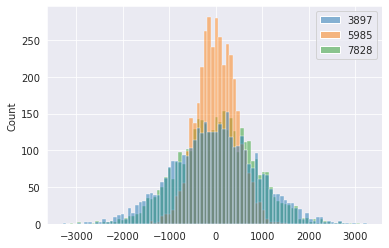

In [20]:
import seaborn as sns

sns.histplot(data=df.sample(n=3, axis='columns'))

after a few reloads, the columns show that we are dealing with data that are not linearly separable

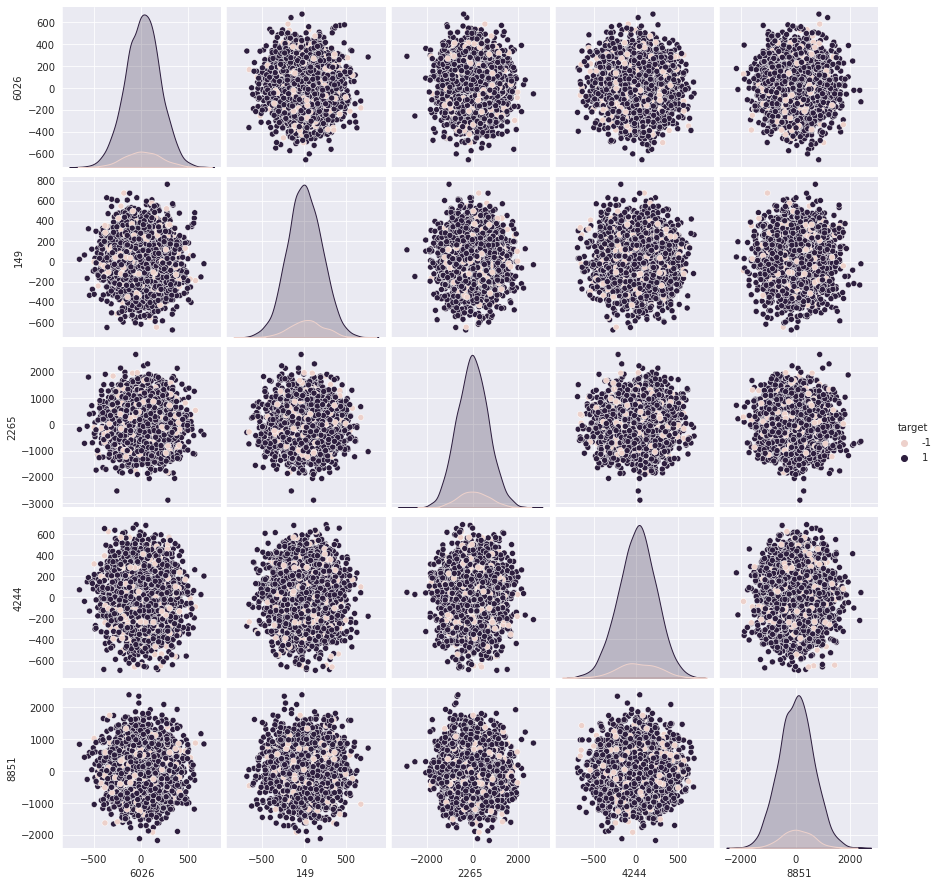

In [22]:
df_sample = df.sample(n=5, axis='columns')
df_sample['target'] = df_labels['target']

sns.pairplot(df_sample, hue='target')